Universidad del Valle de Guatemala <br>
Facultad de Ingeniería <br>
Departamento de Ciencias de la Computación <br>
Modelación y Simulación

# Laboratorio 10

Integrantes:
- Marco Orozco
- Diego Perdomo 
- Isabel Solano

## Instrucciones
- Esta actividad en grupos de 4 máximo
- No se permitirá ni se aceptará cualquier indicio de copia. De presentarse, se procederá según el reglamento correspondiente.
- Recuerden dejar claro el procedimiento seguido para las soluciones dadas cuando corresponda.
- Cuando corresponda, deberán generar un archivo PDF para subirlo al espacio en Canvas.
- Cuando corresponda, deberán subir el archivo de código correspondiente a las respuestas de cada task.

## Ejercicio Único
Como bien sabemos, una aplicación tradicional de Algoritmos Genéticos es la optimización de funciones, pero este no solo se limita a ello, sino también, al ser este algoritmo potenciado con Redes Neuronales, se pueden llegar a crear proyectos más complejos. <br>
Para este ejercicio tienen libertad de elegir un tema o aplicación de Algoritmos Genéticos. Teniendo en cuenta que deben programar el framework para algoritmos genéticos que consiste en
- Función objetivo/fitness/apitud
- Función de selección
- Función de crossover
- Función de mutación
- Función de ejecución (en esta se hacen llamadas a las funciones mencionadas anteriormente
<br>

Además, si deciden hacer la optimización de funciones, deben usar por lo menos dos funciones de ejemplo y
mostrar cual es el resultado matemático correcto. <br>
Recuerden citar adecuadamente todas las fuentes que utilicen.


A continuación se presentará una apliacción de un algoritmo genético para, a partir de cietnos de cadenas aleatorias, obtener la frase "**modelación y simulación 2023**" luego de que hayan pasado por diversas mutaciones. 

In [1]:
# librerías
import random
import matplotlib.pyplot as plt

In [2]:
# variables necesarias
goal = "Modelación y Simulación 2023"
goal_lenght = len(goal)
options = "1234567890qwertyuiopasdfghjklñzxcvbnmáéíóú QWERTYUIOPASDFGHJKLZXCVBNMÁÉÍÓÚ"
population_size = 500
mutation_rate = 0.01


In [3]:
# función de generación
def gen_rand_seq():
    ret = "".join(random.choice(options) for _ in range(goal_lenght))
    return ret

    """
    Geneara una secuencia del largo de la secuencia meta con las
    opciones disponibles
    """

In [4]:
# función de aptitud
def aptitud_score(seq):
    score = 0
    for i in range(goal_lenght):
        if goal[i] == seq[i]:
            score += 1
    return score

    """
    Determina el parecido entre una cadena y la meta
    """

In [5]:
# función de fitness 1
def choose_parents(population):
    opt = random.sample(population, 10)
    opt.sort(key=lambda x: -aptitud_score(x))
    return opt[0], opt[1]
    """
    Obtiene una muestra random de la población de la cual
    selecciona a las secuencias con la aptitud más alta
    """

In [6]:
# función de fitness 2
def replace_population(population, desc):
    population.sort(key= lambda x: - aptitud_score(x))
    for i in range(len(desc)):
        population[-(i + 1)] = desc[i]

In [7]:
# función de crossover
def crossover(parent1, parent2):
    pos = random.randint(1, goal_lenght - 1)
    child1 = parent1[:pos] + parent2[pos:]
    child2 = parent2[:pos] + parent2[pos:]
    return child1, child2
    """
    De 2 secuencias cruza los valores padres en un punto aleatorio
    y retorna 2 secuencias con el inicio del primer padre y el final
    del segundo y viceversa
    """

In [8]:
# función de mutación
def mutate(seq):
    new_seq = ""
    for i in range(goal_lenght):
        if random.random() < mutation_rate:
            new_seq += random.choice(options)
        else:
            new_seq += seq[i]
    return new_seq
    """
    Realiza mutaciones en la secuencia acorde a la tasa
    de mutación 
    """

In [9]:
found_at = []

In [10]:
# función de ejecución (algoritmo genético principal)
def exe():
    population_ = [gen_rand_seq() for _ in range(population_size)]
    gen = 0

    # visualización de datos
    aptitudes = []
    aptitude_averages = []
    best_aptitudes = []
    worst_aptitudes = []

    search = True
    while (search):
        # calcular aptitudes
        aptitudes = []
        for seq in population_:
            aptitudes.append(aptitud_score(seq))
        aptitude_averages.append(sum(aptitudes) / len(aptitudes))
        best_aptitudes.append(max(aptitudes))
        worst_aptitudes.append(min(aptitudes))
        
        # verificar el objetivo
        if max(aptitudes) == len(goal):
            print(f"Gen {gen}: {population_[aptitudes.index(max(aptitudes))]}")
            print("¡Se ha encontrado el objetivo!")
            search = False

        children = []
        for _ in range(population_size // 2):
            parent1, parent2 = choose_parents(population_)
            child1, child2 = crossover(parent1, parent2)
            children.extend([mutate(child1), mutate(child2)])

        # sustituir población actual por descendientes
        replace_population(population_, children)

        # Metadatos cada 10 generaciones
        if gen % 10 == 0 or gen == 0:
            ind =  aptitudes.index(max(aptitudes))
            # print(aptitudes)
            # print("max ", max(aptitudes))
            # print("ind ", ind)
            print(f"Gen {gen}: {population_[ind]}")

        gen += 1

    found_at.append(gen)
    plt.plot(aptitude_averages, label='Promedio')
    plt.plot(best_aptitudes, label='Mejor')
    plt.plot(worst_aptitudes, label='Peor')
    plt.legend()
    plt.title('Progreso de Aptitudes')
    plt.xlabel('Generación')
    plt.ylabel('Aptitud')
    plt.show()

===========||Iteración 0||==================
Gen 0: SÁnYÍXCíAnlYníZUÁtUATckBáInú
Gen 10: rza1lKginnHyBuZmuea7ÚóÉ7h0nl
Gen 20: rzd1lKgión5y uZmula7Úón 20n3
Gen 30: rod1lKgión y uZmulaijón 2X23
Gen 40: rod1lagión y S mula7ión 2023
Gen 50: rodelación y Simulación 2023
Gen 60: rodelZción y Simulación 2023
Gen 70: rodelación y Sim8lación 2023
Gen 74: Modelación y Simulación 2023
¡Se ha encontrado el objetivo!


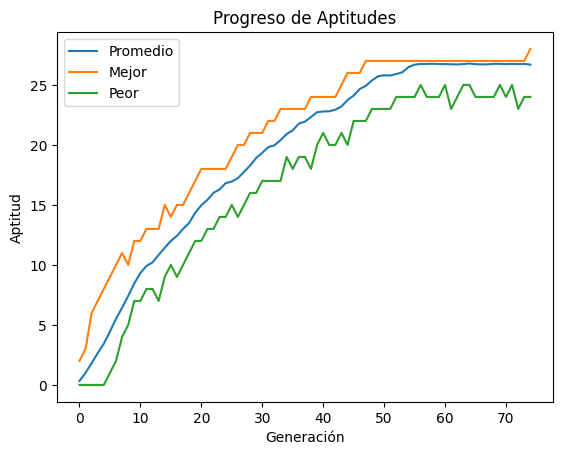

===========||Iteración 1||==================
Gen 0: oBGyqkVkYrH21kcM6N JÓbu1ll2Y
Gen 10: ÍoíJjmcVAq7f DÚáuCcZióB  22J
Gen 20: MoíeMaciwnNñ 8im4lÓíióB 9023
Gen 30: Moíe0aciwn y 8imulaÚióB U023
Gen 40: Modelaciwn y 8imulaÚióB 2023
Gen 50: Modelaciwn y SimulaÚióé 2023
Gen 60: Modelación y SimulaÚióB 2023
Gen 69: Modelación y Simulación 2023
¡Se ha encontrado el objetivo!


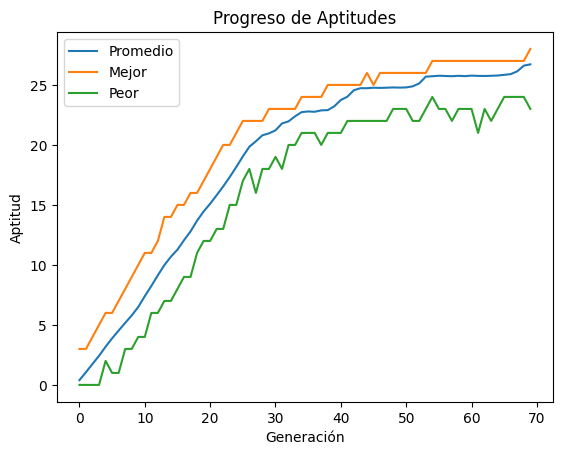

===========||Iteración 2||==================
Gen 0: Íí9HÉtééXfñAHJrbuBzjÍT4H6c7W
Gen 10: MóóelLÓ0Xn4ywSiáIadAiqQq20ÚU
Gen 20: MódelaJiñn4y SimUlA2kól 2b22
Gen 30: ModGlaMiXn4y Simul2Aisn m024
Gen 40: ModelaMión y Simul2Aión 2023
Gen 50: ModelaMión y SimulBción 2023
Gen 60: Modelación y SimulBción 2023
Gen 70: Modelación y Simulmción 2023
Gen 80: Modelación y SimulBción 2023
Gen 86: Modelación y Simulación 2023
¡Se ha encontrado el objetivo!


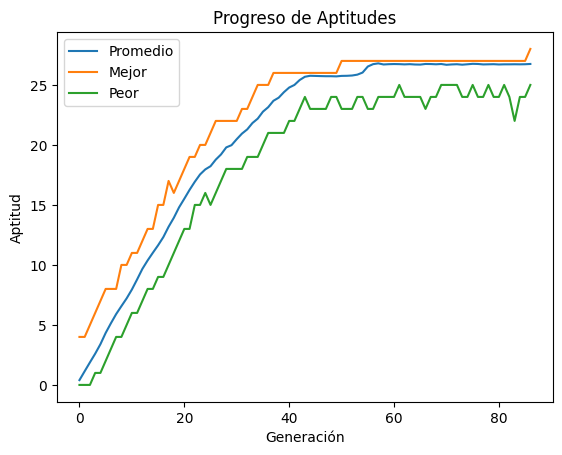

===========||Iteración 3||==================
Gen 0: sAÁ3úeMVerxÍEyTpkínmUzÁ5wNÁj
Gen 10: MoieÉKcbUlMsRSgU9óÓclHnbH07i
Gen 20: ModeÉKcXTnHy SiIulbci6nb20c3
Gen 30: ModelKcXTnHy SiIulbcibn 202z
Gen 40: ModelKc5ón yZSiIulbcibn 2023
Gen 50: ModelKc5ón y SimulbciJn 2023
Gen 60: Modelac5ón y Simulacibn 2023
Gen 67: Modelación y Simulación 2023
¡Se ha encontrado el objetivo!


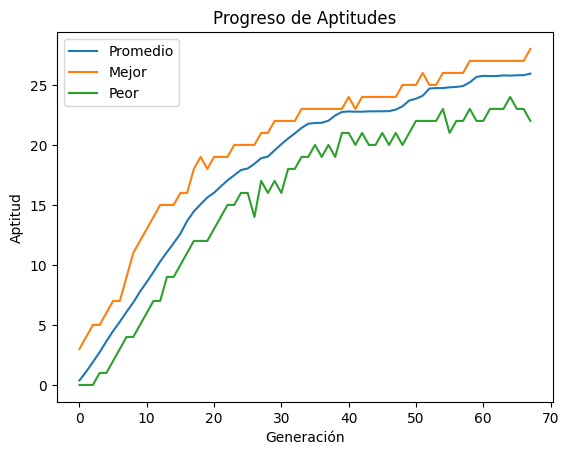

===========||Iteración 4||==================
Gen 0: h6dYúgÁ5Uá ÓVhé1T á3btgXtVMl
Gen 10: 7édelRciaF yBAbm7YWsiwPH6cís
Gen 20: 7édelacióU y Ó9m7Yabawn 6c23
Gen 30: 7édelación y dXmílaciwn 2J23
Gen 40: h delación y dXm7lación 2023
Gen 50: 7odelación y dXmílación 2023
Gen 60: Modelación y Simílación 2023
Gen 67: Modelación y Simulación 2023
¡Se ha encontrado el objetivo!


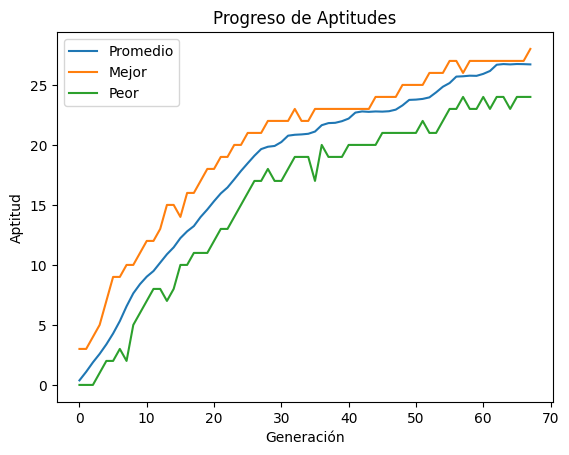

Encontrado en promedio en 73.6


In [11]:
iterations = 5
for i in range(iterations):
    print("===============================================")
    print(f"===========||Iteración {i}||==================")
    exe()

print(f"Encontrado en promedio en {sum(found_at) / len(found_at)}")